hard voting - take major number of appearance, but will failed in even number of occurrence
soft voting - take sum of all probability (p and q) take which is more.

Reference : https://www.kaggle.com/toramky/eda-for-automobile-dataset

In [2]:
import pandas as pd
df = pd.read_csv('/Users/03000070/Downloads/Automobile_data (1).csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


First step in EDA, is variable identification, i.e what is x and what is y
Missing value identification, drop it (based on condition it should not effect the dataset) or replace with mean or replace with mode
or nearest neigbour imputation (like KNN), 
### class imbalance - if y has 98% same data so model accurray will be high and it will always gives same data as output.
ex. email filters for spam if trained with 98% percent of spam email and 2% percent no spam so it will always gives spam
### Random oversampling - repeating the 2% percent of data until its meets the 98% percent count of data.

### SMOTE - Synthetic minority oversampling techinque- used to remove class imbalance, problem is if you take outlier then all the synthetic data will be outlier

### Univariate Analysis
### bivariate Analysis

Reference : https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation


In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
103     5
95      5
74      5
94      5
65      5
102     5
85      5
168     5
148     4
93      4
122     4
106     4
118     4
101     3
83      3
154     3
137     3
125     3
115     3
194     2
129     2
81      2
119     2
89      2
108     2
110     2
164     2
145     2
153     2
158     2
197     2
188     2
113     2
87      2
192     2
90      1
77      1
98      1
231     1
121     1
186     1
107     1
78      1
256     1
142     1
Name: normalized-losses, dtype: int64

In [18]:
def fill_missing_value(df,col,pattern):
    return df[col].replace(pattern,df[df[col]!=pattern][col].astype(float).mean(),inplace=True)

In [19]:
fill_missing_value(df,'normalized-losses','?')

In [45]:
df['normalized-losses']=df['normalized-losses'].astype('float')
df['normalized-losses'].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, dtype: int64

In [21]:
fill_missing_value(df,'bore','?')

In [47]:
fill_missing_value(df,'stroke','?')
fill_missing_value(df,'horsepower','?')
fill_missing_value(df,'peak-rpm','?')
fill_missing_value(df,'price','?')

df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')
df['price'] = df['price'].astype('float')



In [24]:
df['stroke'].value_counts()

3.4                   20
3.15                  14
3.03                  14
3.23                  14
3.39                  13
2.64                  11
3.35                   9
3.29                   9
3.46                   8
3.07                   6
3.5                    6
3.27                   6
3.58                   6
3.19                   6
3.41                   6
3.11                   6
3.64                   5
3.52                   5
3.47                   4
3.86                   4
3.2554228855721337     4
3.54                   4
3.9                    3
2.9                    3
2.68                   2
2.8                    2
2.19                   2
4.17                   2
3.08                   2
3.1                    2
2.36                   1
3.21                   1
3.12                   1
2.76                   1
3.16                   1
2.07                   1
2.87                   1
Name: stroke, dtype: int64

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [30]:
#just change mean to mode as its categorical data
def fill_missing_value_for_catergory(df,col,pattern):
    return df[col].replace(pattern,df[df[col]!=pattern][col].mode().tolist()[0],inplace=True)

In [33]:
fill_missing_value_for_catergory(df,'num-of-doors','?')
fill_missing_value_for_catergory(df,'num-of-cylinders','?')

In [34]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [39]:
from word2number import w2n
w2n.word_to_num('one')

1

In [48]:
#missing code

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [49]:
df['num-of-doors'] = df['num-of-doors'].apply(w2n.word_to_num)
df['num-of-cylinders'] = df['num-of-cylinders'].apply(w2n.word_to_num)


In [51]:
#convert int to category type
df["num-of-doors"] = df["num-of-doors"].astype("category")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("category")

In [52]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


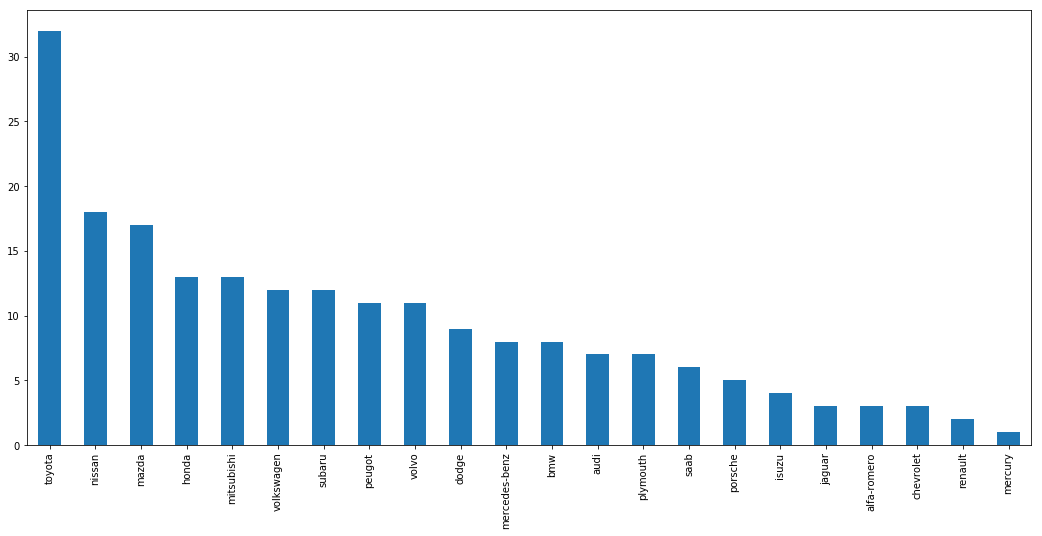

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
df["make"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 0, 'HP')

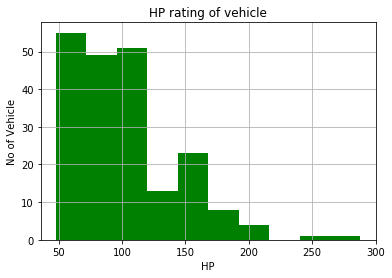

In [55]:
df.horsepower.hist(bins=10,color='green')
plt.title('HP rating of vehicle')
plt.ylabel('No of Vehicle')
plt.xlabel('HP')

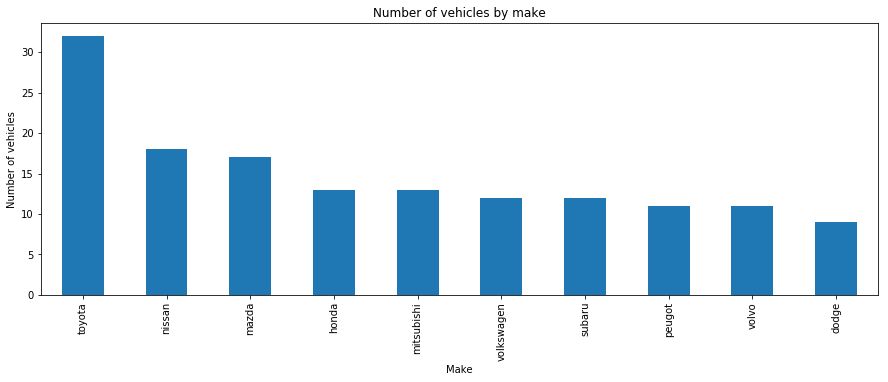

In [56]:
# top 10 make wise
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

R-square calculates the distance between y and y pred, works with linear, knn, etc. 

AIC : 

VIF : Various Inflation Factor 

To Calculate the accuracy matrix of logistics classification    
    
# Precision 
# Recall
# Sensitivity
# Spacivity
# AUC
# RUC
# F1 score
# Support